# Data Cleaning & Exploration
Welcome to the sixth lesson! This Jupyter Notebook file is meant to accompany **L06 - Data Cleaning & Exploration.**

Type your solutions for each exercise in the code cells below, and then press **Shift + Enter** to execute your code. Then, check the solution video to see how you did!

### 1. The Machine Learning Process

### 2. Introduction to Matplotlib and Seaborn

### 3. Correcting Categorical Features

<font color = 'blue'> **EXERCISE 3.1** </font>

In [1]:
# Import NumPy, Pandas, Pyplot (from Matplotlib), and Seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Import Stock Data.csv into a new DataFrame
stock_data = pd.read_csv('C:\\Users\\zacha\\Desktop\\MLE Test\\ML 01. Module Files\\Stock Data_v2.csv')

# Display the first row
stock_data.head(1)


,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
0,AAPL,APPLE INC,Information Technology,1.09,1081130615,223.84,232.27,8.43,0.038


In [3]:
# Display the unique values in 'Sector'
stock_data.Sector.unique()


array(['Information Technology', 'Consumer Discretionary', 'Financials',
       'Health Care', 'Energy', 'Consumer Staples', nan,
       'Telecommunication Services', 'Industrials',
       'Information Technology .', 'Materials', 'Industrial$',
       'Utilities', 'Enersy', 'lndustrials', 'Real Estate'], dtype=object)

<font color = 'blue'> **EXERCISE 3.2** </font>

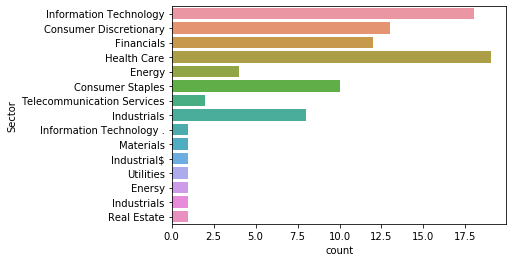

In [4]:
sns.countplot(y='Sector', data=stock_data)
plt.show()

<font color = 'blue'> **EXERCISE 3.3** </font>

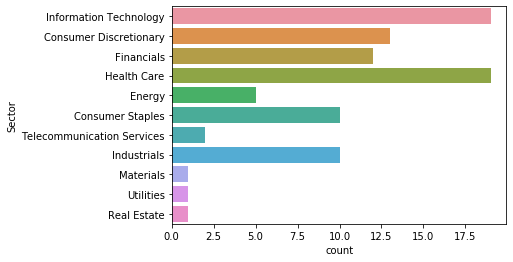

In [5]:
stock_data.Sector.replace('Information Technology .', 'Information Technology', inplace=True)
stock_data.Sector.replace('Enersy', 'Energy', inplace=True)
stock_data.Sector.replace(['Industrial$', 'lndustrials'], 'Industrials', inplace=True)

sns.countplot(y='Sector', data=stock_data)
plt.show()

<font color = 'blue'> **EXERCISE 3.4** </font>

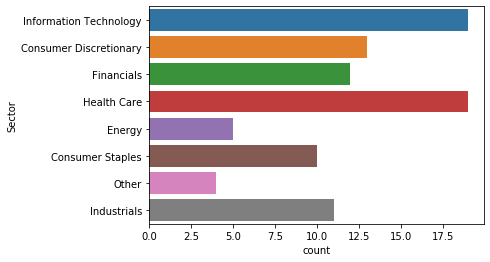

In [6]:
stock_data.Sector.replace('Materials', 'Industrials', inplace=True)
stock_data.Sector.replace(['Telecommunication Services', 'Utilities', 'Real Estate'], 'Other', inplace=True)

sns.countplot(y='Sector', data=stock_data)
plt.show()

### 4. Outliers & Unwanted Observations

<font color = 'blue'> **EXERCISE 4.1** </font>

In [7]:
# Display the dimensions of the stock_data DataFrame
stock_data.shape


(100, 9)

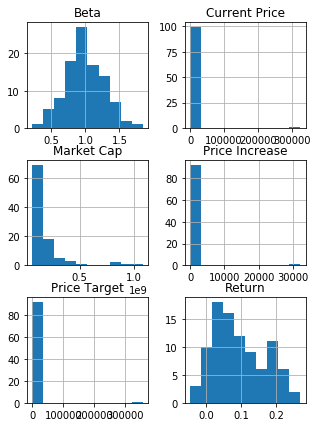

In [8]:
# Display histograms for all continuous features
stock_data.hist(figsize=(5, 7))
plt.show()


<font color = 'blue'> **EXERCISE 4.2** </font>

In [9]:
stock_data[stock_data['Current Price'] > 300000]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.0,357125.0,32126.0,0.099


<font color = 'blue'> **EXERCISE 4.3a** </font>

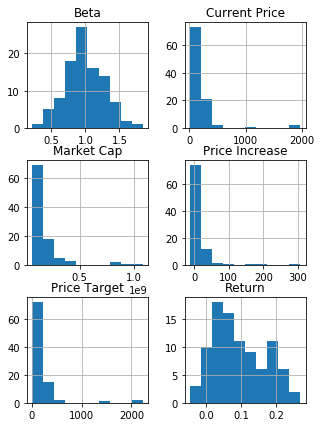

In [10]:
stock_data_sans_brk = stock_data[stock_data['Current Price'] < 300000]
stock_data_sans_brk.hist(figsize=(5, 7))
plt.show()

<font color = 'blue'> **EXERCISE 4.3b** </font>

In [11]:
stock_data[stock_data['Current Price'] > 1000]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
1,AMZN,AMAZON.COM INC,Consumer Discretionary,1.23,960942834,1970.19,2133.39,163.20,0.083
3,GOOGL,ALPHABET INC-A,Information Technology,1.44,817459888,1177.98,1384.89,206.91,0.176
4,BRK/A,BERKSHIRE HATH-A,Financials,1.13,534247506,324999.00,357125.00,32126.00,0.099
66,BKNG,BOOKING HOLDINGS,Consumer Discretionary,0.74,90969219,1916.27,2222.78,306.51,0.160


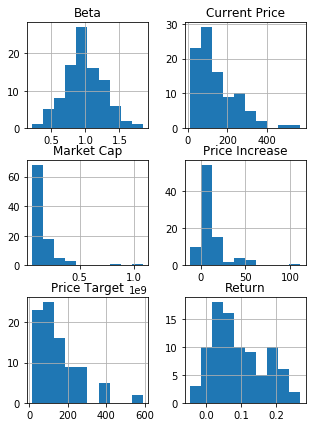

In [12]:
stock_data_sans_outliers = stock_data[stock_data['Current Price'] < 1000]
stock_data_sans_outliers.hist(figsize=(5, 7))
plt.show()

<font color = 'blue'> **EXERCISE 4.4** </font>

In [13]:
stock_data.describe()

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,100.000000,1.000000e+02,100.000000,93.000000,93.000000,93.000000
mean,0.995800,1.756136e+08,3441.165500,4051.011720,364.757312,0.093785
std,0.283446,1.806083e+08,32481.881894,37011.566893,3329.559536,0.073745
min,0.220000,6.389023e+07,12.680000,15.560000,-11.770000,-0.047000
25%,0.810000,8.195384e+07,69.630000,74.530000,3.880000,0.035000
50%,0.990000,1.119556e+08,117.600000,123.930000,8.930000,0.079000
75%,1.182500,1.987309e+08,219.430000,217.130000,16.560000,0.149000
max,1.840000,1.081131e+09,324999.000000,357125.000000,32126.000000,0.270000


<font color = 'blue'> **EXERCISE 4.5** </font>

In [14]:
stock_data[pd.isnull(stock_data['Price Target'])]

,Ticker,Name,Sector,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
12,SPY,SPDR S&P 500 ETF,NaN,1.00,270949532,290.88,NaN,NaN,NaN
31,IW,ISHARES-C S&P500,NaN,1.01,164820451,292.91,NaN,NaN,NaN
54,VTI,VANGUARD TL SK E,NaN,0.98,106340549,150.28,NaN,NaN,NaN
55,VOO,VANGUARD S&P 500,NaN,0.99,104131469,267.36,NaN,NaN,NaN
81,QQQ,INVESCO QQQ TRUS,NaN,1.22,71443317,183.99,NaN,NaN,NaN
83,EFA,ISHARES MSCI EAF,NaN,0.76,69817606,66.76,NaN,NaN,NaN
84,VEA,VANGUARD FTSE ET,NaN,0.76,69795021,42.71,NaN,NaN,NaN


<font color = 'blue'> **EXERCISE 4.6** </font>

In [15]:
stock_data = stock_data.dropna()
stock_data.describe()

,Beta,Market Cap,Current Price,Price Target,Price Increase,Return
count,93.000000,9.300000e+01,93.000000,93.000000,93.000000,93.000000
mean,0.998495,1.796136e+08,3686.254409,4051.011720,364.757312,0.093785
std,0.291010,1.857849e+08,33682.068837,37011.566893,3329.559536,0.073745
min,0.220000,6.389023e+07,12.680000,15.560000,-11.770000,-0.047000
25%,0.810000,8.270243e+07,69.980000,74.530000,3.880000,0.035000
50%,0.990000,1.164038e+08,114.570000,123.930000,8.930000,0.079000
75%,1.190000,2.067081e+08,209.070000,217.130000,16.560000,0.149000
max,1.840000,1.081131e+09,324999.000000,357125.000000,32126.000000,0.270000


<font color = 'blue'> **EXERCISE 4.7** </font>

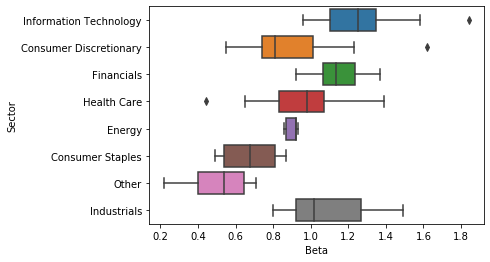

In [16]:
# Display the box distribution of 'Beta' by 'Sector'
sns.boxplot(y='Sector', x='Beta', data=stock_data)
plt.show()


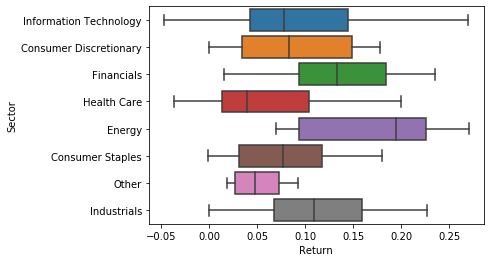

In [17]:
# Display the box distribution of 'Return' by 'Sector'
sns.boxplot(y='Sector', x='Return', data=stock_data)
plt.show()
